In [ ]:
import os
import time
import shutil
from pathlib import Path

import pandas as pd
from tqdm import tqdm
from IPython.display import Audio, display
from mutagen.mp3 import MP3
from mutagen.wave import WAVE

from utils import download_audios, download_texts
from utils import usx_parser
from utils import audio_stats
# from utils import force_align_book

# Download

## Audios and timing files

In [ ]:
# Directory containing HTML files
html_dir = Path("html_files/audios")
output_base_dir = Path("audios")

# Get all HTML files
html_files = sorted(html_dir.glob("*.html"))

print(f"Found {len(html_files)} languages to process")

for i, html_path in enumerate(html_files):
    lang_name = html_path.stem  # Get filename without extension
    print(f"\n{'='*60}")
    print(f"[{i+1}/{len(html_files)}] Processing: {lang_name}")
    print(f"{'='*60}")
    
    try:
        # 1) Parse HTML -> dict(name -> URL)
        links = download_audios.extract_artifact_links(str(html_path))
        print(f"Found {len(links)} artifacts")
        
        # 2) Download + unzip into folders
        output_dir = output_base_dir / lang_name
        download_audios.download_and_unzip_all(links, str(output_dir), overwrite=False, timeout=60)
        
        print(f"✓ Successfully processed {lang_name}")
        
    except Exception as e:
        print(f"✗ Failed to process {lang_name}: {e}")
        continue
    
    # Sleep 1 minute between languages (except after the last one)
    if i < len(html_files) - 1:
        print(f"\nSleeping for 1 minute before next language...")
        time.sleep(60)

print(f"\n{'='*60}")
print("All languages processed!")
print(f"{'='*60}")



## Text files

In [ ]:
# Directory containing HTML files
html_dir = Path("html_files/text")
output_base_dir = Path("texts")

# Get all HTML files
html_files = sorted(html_dir.glob("*.html"))

print(f"Found {len(html_files)} languages to process")

for i, html_path in enumerate(html_files):
    lang_name = html_path.stem  # Get filename without extension
    print(f"\n{'='*60}")
    print(f"[{i+1}/{len(html_files)}] Processing: {lang_name}")
    print(f"{'='*60}")
    
    try:
        # 1) Parse HTML -> dict(name -> URL)
        links = download_texts.extract_artifact_links(str(html_path))
        print(f"Found {len(links)} artifacts")
        
        # 2) Download + unzip into folders
        output_dir = output_base_dir / lang_name
        download_texts.download_and_unzip_all(links, str(output_dir), overwrite=False, timeout=60)
        
        print(f"✓ Successfully processed {lang_name}")
        
    except Exception as e:
        print(f"✗ Failed to process {lang_name}: {e}")
        continue
    
    # Sleep 1 minute between languages (except after the last one)
    if i < len(html_files) - 1:
        print(f"\nSleeping for 1 minute before next language...")
        # time.sleep(60)

print(f"\n{'='*60}")
print("All languages processed!")
print(f"{'='*60}")



# Parsing text files

## USX

In [52]:
path = "data/texts/Yoruba/USX/release/USX_1/GEN.usx"
df = usx_parser.usx_to_dataframe(path, include_headings=False)
df

,book,chapter,verse,text
0,GEN,1,1,Ní ìbẹ̀rẹ̀ ohun gbogbo Ọlọ́run dá àwọn ọ̀run à...
1,GEN,1,2,"Ayé sì wà ní rúdurùdu, ó sì ṣófo, òkùnkùn sì w..."
2,GEN,1,3,"Ọlọ́run sì wí pé, “Jẹ́ kí ìmọ́lẹ̀ kí ó wà,” ìm..."
3,GEN,1,4,"Ọlọ́run rí i pé ìmọ́lẹ̀ náà dára, ó sì ya ìmọ́..."
4,GEN,1,5,"Ọlọ́run sì pe ìmọ́lẹ̀ náà ní “ọ̀sán,” àti òkùn..."
...,...,...,...,...
1528,GEN,50,22,Josẹfu sì ń gbé ní Ejibiti pẹ̀lú gbogbo ìdílé ...
1529,GEN,50,23,"Ó sì rí ìran kẹta ọmọ Efraimu-Àwọn ọmọ Makiri,..."
1530,GEN,50,24,Nígbà náà ni Josẹfu wí fún àwọn arákùnrin rẹ̀ ...
1531,GEN,50,25,Josẹfu sì mú kí àwọn ọmọ Israẹli búra májẹ̀mú ...


In [ ]:
path = "data/texts/Yoruba/USX/release/USX_1/"
df = usx_parser.usx_directory_to_dataframe(path, include_headings=False)
df

,book,chapter,verse,text
0,1CH,1,1,"Adamu, Seti, Enoṣi,"
1,1CH,1,2,"Kenani, Mahalaleli, Jaredi,"
2,1CH,1,3,"Enoku, Metusela, Lameki, Noa."
3,1CH,1,4,"Àwọn ọmọ Noa: Ṣemu, Hamu àti Jafeti."
4,1CH,1,5,"Àwọn ọmọ Jafeti ni: Gomeri, Magogu, Madai; Jaf..."
...,...,...,...,...
31082,ZEP,3,16,"Ní ọjọ́ náà, wọn yóò sọ fún Jerusalẹmu pé, “Má..."
31083,ZEP,3,17,"Olúwa Ọlọ́run rẹ wà pẹ̀lú rẹ, Ó ní agbára láti..."
31084,ZEP,3,18,“Èmi ó kó àwọn tí ó ń banújẹ́ fún àjọ̀dún tí a...
31085,ZEP,3,19,Ní àkókò náà ni èmi yóò dojúkọ àwọn tí ń ni yí...


In [ ]:
def test_usx_parser_all_files(texts_dir: str = "data/texts") -> pd.DataFrame:
    """
    Test usx_to_dataframe on all USX files in the texts directory.
    
    Args:
        texts_dir: Path to the texts directory containing language folders.
        
    Returns:
        DataFrame with columns: language, file_path, success, error_message, num_rows
    """
    texts_path = Path(texts_dir)
    
    # Find all USX files
    # Include all USX files under the texts_path (looks for any .usx at any subdirectory depth)
    usx_files = list(texts_path.glob("**/*.usx"))
    
    results = []
    for usx_file in tqdm(usx_files, desc="Testing USX files"):
        # Extract language from path (first directory under texts_dir)
        relative_path = usx_file.relative_to(texts_path)
        language = relative_path.parts[0]
        
        # Test parsing
        try:
            df = usx_parser.usx_to_dataframe(usx_file, include_headings=False)
            results.append({
                "language": language,
                "file_path": str(usx_file),
                "success": True,
                "error_message": None,
                "num_rows": len(df)
            })
        except Exception as e:
            results.append({
                "language": language,
                "file_path": str(usx_file),
                "success": False,
                "error_message": str(e),
                "num_rows": None
            })
    
    return pd.DataFrame(results)


# Run the test
results_df = test_usx_parser_all_files(texts_dir="data/texts")
results_df

In [6]:
results_df["language"].nunique()

39

In [7]:
all_files = os.listdir("data/texts")
set(all_files) - set(results_df["language"])

{'Toma'}

In [8]:
# Summary statistics
print(f"Total files tested: {len(results_df)}")
print(f"Successful: {results_df['success'].sum()}")
print(f"Failed: {(~results_df['success']).sum()}")
print(f"\nLanguages: {results_df['language'].nunique()}")

# Show failures if any
failed_df = results_df[~results_df['success']]
if len(failed_df) > 0:
    print(f"\n--- Failed files ---")
    display(failed_df)
else:
    print("\nAll files parsed successfully!")
    
# Summary by language
summary_by_lang = results_df.groupby('language').agg({
    'success': ['sum', 'count'],
    'num_rows': 'sum'
}).reset_index()
summary_by_lang.columns = ['language', 'successful_files', 'total_files', 'total_rows']
summary_by_lang['success_rate'] = summary_by_lang['successful_files'] / summary_by_lang['total_files']
print("\n--- Summary by language ---")
summary_by_lang

Total files tested: 2514
Successful: 2514
Failed: 0

Languages: 39

All files parsed successfully!

--- Summary by language ---


,language,successful_files,total_files,total_rows,success_rate
0,Apali,29,29,10218,1.0
1,Arabic Standard,66,66,31103,1.0
2,Assamese,66,66,31092,1.0
3,Bengali,66,66,31096,1.0
4,Central Kurdish,66,66,31103,1.0
5,Chhattisgarhi,66,66,31103,1.0
6,Chichewa,66,66,31104,1.0
7,Dawro,66,66,30815,1.0
8,Dholuo,66,66,31103,1.0
9,Ewe,66,66,31103,1.0


# Audio stats

In [73]:
audio_df = audio_stats.get_all_audio_files(audios_dir="data/audios", alignment_filter="exclude")
audio_df.head()

,language,testament_format,book,file_name,file_path,format,file_size_mb,duration_seconds
0,Apali,New Testament - mp3,Matthew,MAT_001.mp3,data/audios/Apali/New Testament - mp3/Matthew/...,mp3,3.41,446.6
1,Apali,New Testament - mp3,Matthew,MAT_002.mp3,data/audios/Apali/New Testament - mp3/Matthew/...,mp3,5.11,670.1
2,Apali,New Testament - mp3,Matthew,MAT_003.mp3,data/audios/Apali/New Testament - mp3/Matthew/...,mp3,3.11,407.7
3,Apali,New Testament - mp3,Matthew,MAT_004.mp3,data/audios/Apali/New Testament - mp3/Matthew/...,mp3,4.13,541.8
4,Apali,New Testament - mp3,Matthew,MAT_005.mp3,data/audios/Apali/New Testament - mp3/Matthew/...,mp3,9.90,1297.6


In [74]:
# Total hours per language
hours_per_language = (
    audio_df
    .assign(duration_seconds=pd.to_numeric(audio_df["duration_seconds"], errors="coerce"))
    .groupby("language", as_index=False)
    .agg(
        files=("duration_seconds", "size"),
        readable_files=("duration_seconds", lambda s: s.notna().sum()),
        total_seconds=("duration_seconds", "sum"),
    )
    .assign(
        total_hours=lambda df: df["total_seconds"] / 3600,
        total_hours_rounded=lambda df: df["total_hours"].round(2),
    )
    .sort_values("language", ascending=True)
)

hours_per_language[["language", "files", "readable_files", "total_hours_rounded"]]


,language,files,readable_files,total_hours_rounded
0,Apali,345,345,73.32
1,Arabic Standard,1189,1189,89.27
2,Assamese,1189,1189,110.31
3,Bengali,1189,1189,102.54
4,Central Kurdish,1189,1189,90.17
5,Chhattisgarhi,1189,1189,107.14
6,Chichewa,1189,1189,120.10
7,Dawro,1189,1189,128.48
8,Dholuo,1189,1189,80.39
9,Ewe,1189,1189,101.93


In [76]:
total_hours_all_languages = audio_df["duration_seconds"].sum() / 3600
print(f"TOTAL HOURS (all languages): {total_hours_all_languages:.2f}")

TOTAL HOURS (all languages): 3961.54


# Alignment

## Using timing files

In [81]:
def get_languages_with_timing_files(audios_dir: str = "data/audios") -> pd.DataFrame:
    """
    Check which languages have a 'Timing Files' folder.
    
    Args:
        audios_dir: Path to the audios directory containing language folders.
        
    Returns:
        DataFrame with columns: language, has_timing_files
    """
    audios_path = Path(audios_dir)
    
    # Get all language directories (immediate subdirectories)
    language_dirs = [d for d in audios_path.iterdir() if d.is_dir()]
    
    results = []
    for lang_dir in sorted(language_dirs):
        timing_folder = lang_dir / "Timing Files"
        results.append({
            "language": lang_dir.name,
            "has_timing_files": timing_folder.exists() and timing_folder.is_dir()
        })
    
    return pd.DataFrame(results)


# Run the function
timing_df = get_languages_with_timing_files(audios_dir="data/audios")
timing_df["has_timing_files"].value_counts()

has_timing_files
True     28
False    12
Name: count, dtype: int64

In [82]:
# %%bash
# # This works, but only for one book
# python utils/split_verse_lingala.py \
#     -wav_folder "data/audios/Lingala/New Testament - mp3/1 Corinthians/" \
#     -timing_folder "data/audios/Lingala/Timing Files/Timing Files Bundle/" \
#     -book_sfm "data/texts/Lingala/Paratext (USFM)/release/USX_1/1CO.usfm" \
#     -output "data/audios/Lingala/Alignment/1 Corinthians"

In [83]:
# for _, row in timing_df.iterrows():
#     if row["has_timing_files"]:
#         language = row["language"]
#         cmd = f"""
#         python utils/process_all_books.py xxx
#             --base_path "data/audios/{language}" xxx
#             --timing_folder "data/audios/{language}/Timing Files/Timing Files Bundle" xxx
#             --usfm_folder "data/texts/{language}/Paratext (USFM)/release/USX_1" xxx
#             --workers 16
#         """
#         print(cmd)

In [84]:
def get_alignment_directories(audios_dir="data/audios"):
    """
    Returns a list of all folders in audios_dir that end with '/Alignment'.
    Example: data/audios/LANGUAGE/Alignment/
    """
    audios_path = Path(audios_dir)
    alignment_dirs = []
    for language_dir in audios_path.iterdir():
        if language_dir.is_dir():
            alignment_dir = language_dir / "Alignment"
            if alignment_dir.is_dir():
                alignment_dirs.append(str(alignment_dir))
    return alignment_dirs

alignment_dirs = get_alignment_directories(audios_dir="data/audios")
print(alignment_dirs)

# for alignment_dir in alignment_dirs:
#     try:
#         shutil.rmtree(alignment_dir)
#         print(f"Deleted: {alignment_dir}")
#     except Exception as e:
#         print(f"Failed to delete {alignment_dir}: {e}")

['data/audios/Assamese/Alignment', 'data/audios/Bengali/Alignment', 'data/audios/Central Kurdish/Alignment', 'data/audios/Chhattisgarhi/Alignment', 'data/audios/Ewe/Alignment', 'data/audios/Gujarati/Alignment', 'data/audios/Haryanvi/Alignment', 'data/audios/Hausa/Alignment', 'data/audios/Hiligaynon/Alignment', 'data/audios/Hindi/Alignment', 'data/audios/Kannada/Alignment', 'data/audios/Lingala/Alignment', 'data/audios/Malayalam/Alignment', 'data/audios/Marathi/Alignment', 'data/audios/Oromo/Alignment', 'data/audios/Punjabi/Alignment', 'data/audios/Swahili/Alignment', 'data/audios/Tamil/Alignment', 'data/audios/Telugu/Alignment', 'data/audios/Twi (Akuapem)/Alignment', 'data/audios/Twi (Asante)/Alignment', 'data/audios/Urdu/Alignment', 'data/audios/Vietnamese/Alignment', 'data/audios/Yoruba/Alignment', 'data/audios/Dholuo/Alignment']


In [86]:
audio_df = audio_stats.get_all_audio_files(audios_dir="data/audios", alignment_filter="only")
audio_df.head()

,language,testament_format,book,file_name,file_path,format,file_size_mb,duration_seconds
0,Assamese,Alignment,1 Thessalonians,1TH_001_Verse_001.wav,data/audios/Assamese/Alignment/1 Thessalonians...,wav,1.02,11.11
1,Assamese,Alignment,1 Thessalonians,1TH_001_Verse_002.wav,data/audios/Assamese/Alignment/1 Thessalonians...,wav,0.79,8.61
2,Assamese,Alignment,1 Thessalonians,1TH_001_Verse_003.wav,data/audios/Assamese/Alignment/1 Thessalonians...,wav,1.33,14.48
3,Assamese,Alignment,1 Thessalonians,1TH_001_Verse_004.wav,data/audios/Assamese/Alignment/1 Thessalonians...,wav,0.47,5.18
4,Assamese,Alignment,1 Thessalonians,1TH_001_Verse_005.wav,data/audios/Assamese/Alignment/1 Thessalonians...,wav,1.61,17.63


Median duration (seconds): 10.02
Mean duration (seconds): 11.269715994129102


[(0.0, 40.0)]

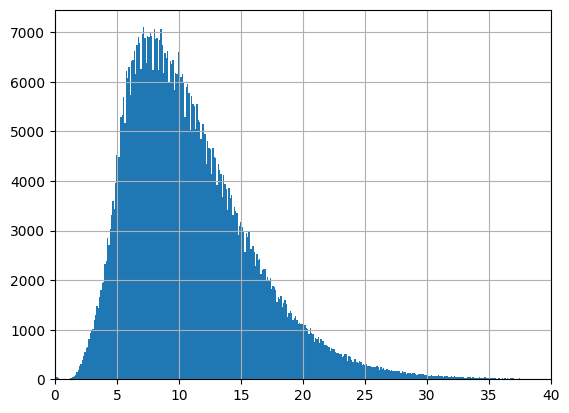

In [96]:
print("Median duration (seconds):", audio_df["duration_seconds"].median())
print("Mean duration (seconds):", audio_df["duration_seconds"].mean())

audio_df["duration_seconds"].hist(bins=10000).set(xlim=(0,40))

In [97]:
# Total hours per language
hours_per_language = (
    audio_df
    .assign(duration_seconds=pd.to_numeric(audio_df["duration_seconds"], errors="coerce"))
    .groupby("language", as_index=False)
    .agg(
        files=("duration_seconds", "size"),
        readable_files=("duration_seconds", lambda s: s.notna().sum()),
        total_seconds=("duration_seconds", "sum"),
    )
    .assign(
        total_hours=lambda df: df["total_seconds"] / 3600,
        total_hours_rounded=lambda df: df["total_hours"].round(2),
    )
    .sort_values("language", ascending=True)
)

hours_per_language[["language", "files", "readable_files", "total_hours_rounded"]]


,language,files,readable_files,total_hours_rounded
0,Assamese,31101,31101,107.95
1,Bengali,31093,31093,100.02
2,Central Kurdish,31060,31060,89.04
3,Chhattisgarhi,31106,31106,105.61
4,Dholuo,31061,31061,81.75
5,Ewe,30806,30806,108.64
6,Gujarati,31096,31096,91.72
7,Hausa,7957,7957,26.66
8,Hindi,31107,31107,101.17
9,Kannada,31105,31105,108.02


In [88]:
total_hours_all_languages = audio_df["duration_seconds"].sum() / 3600
print(f"TOTAL HOURS (all languages): {total_hours_all_languages:.2f}")

TOTAL HOURS (all languages): 2162.74


In [99]:
total_hours_short_audios = audio_df[audio_df["duration_seconds"] <= 30]["duration_seconds"].sum() / 3600
print(f"TOTAL HOURS (audios < 30s): {total_hours_short_audios:.2f}")

TOTAL HOURS (audios < 30s): 2069.76


## Using force alignment

In [100]:
def get_languages_with_timing_files(audios_dir: str = "data/audios") -> pd.DataFrame:
    """
    Check which languages have a 'Timing Files' folder.
    
    Args:
        audios_dir: Path to the audios directory containing language folders.
        
    Returns:
        DataFrame with columns: language, has_timing_files
    """
    audios_path = Path(audios_dir)
    
    # Get all language directories (immediate subdirectories)
    language_dirs = [d for d in audios_path.iterdir() if d.is_dir()]
    
    results = []
    for lang_dir in sorted(language_dirs):
        timing_folder = lang_dir / "Timing Files"
        results.append({
            "language": lang_dir.name,
            "has_timing_files": timing_folder.exists() and timing_folder.is_dir()
        })
    
    return pd.DataFrame(results)


# Run the function
timing_df = get_languages_with_timing_files(audios_dir="data/audios")
timing_df["has_timing_files"].value_counts()

has_timing_files
True     28
False    12
Name: count, dtype: int64

In [101]:
for _, row in timing_df.iterrows():
    if not row["has_timing_files"]:
        language = row["language"]
        cmd = f"""
        python utils/process_all_books_force_align.py xxx
            --base_path "data/audios/{language}" xxx
            --usfm_folder "data/texts/{language}/USX/release/USX_1" xxx
            --language "und" xxx
            --workers 32 xxx
            --chapter-intro "chapter introduction placeholder"
        """
        print(cmd)


        python utils/process_all_books_force_align.py xxx
            --base_path "data/audios/Apali" xxx
            --usfm_folder "data/texts/Apali/USX/release/USX_1" xxx
            --language "und" xxx
            --workers 32 xxx
            --chapter-intro "chapter introduction placeholder"
        

        python utils/process_all_books_force_align.py xxx
            --base_path "data/audios/Arabic Standard" xxx
            --usfm_folder "data/texts/Arabic Standard/USX/release/USX_1" xxx
            --language "und" xxx
            --workers 32 xxx
            --chapter-intro "chapter introduction placeholder"
        

        python utils/process_all_books_force_align.py xxx
            --base_path "data/audios/Chichewa" xxx
            --usfm_folder "data/texts/Chichewa/USX/release/USX_1" xxx
            --language "und" xxx
            --workers 32 xxx
            --chapter-intro "chapter introduction placeholder"
        

        python utils/process_all_books_force_alig